<a href="https://colab.research.google.com/github/Jythraa/Week-1/blob/main/GHG_Emission_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greenhouse Gas Emission Prediction Project

This project aims to predict supply chain greenhouse gas emissions using regression models. We will train and evaluate three models — Linear Regression, Decision Tree, and Random Forest — and fine-tune the Random Forest model using GridSearchCV.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv")

# Drop the first row if it's a duplicate header
df = df[df['Supply Chain Emission Factors without Margins'] != 'Supply Chain Emission Factors without Margins']

# Drop unnecessary columns
df.drop(columns=['Unnamed: 7', 'Industry Code', 'Unit'], inplace=True)

# Convert numeric columns
numeric_cols = ['Supply Chain Emission Factors without Margins',
                'Margins of Supply Chain Emission Factors',
                'Supply Chain Emission Factors with Margins']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing target
df.dropna(subset=['Supply Chain Emission Factors with Margins'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

df.head()

,Industry Name,Substance,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,Farms,methane,0.023,0.000,0.023,3,2,1,1,1
1,Farms,nitrous oxide,0.002,0.000,0.002,4,2,1,4,1
2,Farms,other GHGs,0.004,0.000,0.004,3,2,1,4,1
3,"Forestry, fishing, and related activities",carbon dioxide,0.184,0.017,0.201,4,2,1,4,1
4,"Forestry, fishing, and related activities",methane,0.001,0.000,0.001,3,2,1,1,1


In [ ]:
# Label encode categorical variables
label_encoders = {}
for col in ['Industry Name', 'Substance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Industry Name,Substance,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,15,1,0.023,0.000,0.023,3,2,1,1,1
1,15,2,0.002,0.000,0.002,4,2,1,4,1
2,15,3,0.004,0.000,0.004,3,2,1,4,1
3,20,0,0.184,0.017,0.201,4,2,1,4,1
4,20,1,0.001,0.000,0.001,3,2,1,1,1


In [ ]:
# Feature matrix and target vector
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}\n")
    return [name, rmse, mae, r2]

results = []
results.append(evaluate_model("Linear Regression", lr, X_test, y_test))
results.append(evaluate_model("Decision Tree", dt, X_test, y_test))
results.append(evaluate_model("Random Forest", rf, X_test, y_test))

Linear Regression Performance:
RMSE: 0.0002
MAE:  0.0001
R²:   1.0000

Decision Tree Performance:
RMSE: 0.2899
MAE:  0.0428
R²:   0.6207

Random Forest Performance:
RMSE: 0.3214
MAE:  0.0487
R²:   0.5338



In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate tuned model
results.append(evaluate_model("Tuned Random Forest", best_rf, X_test, y_test))

Tuned Random Forest Performance:
RMSE: 0.3214
MAE:  0.0487
R²:   0.5338



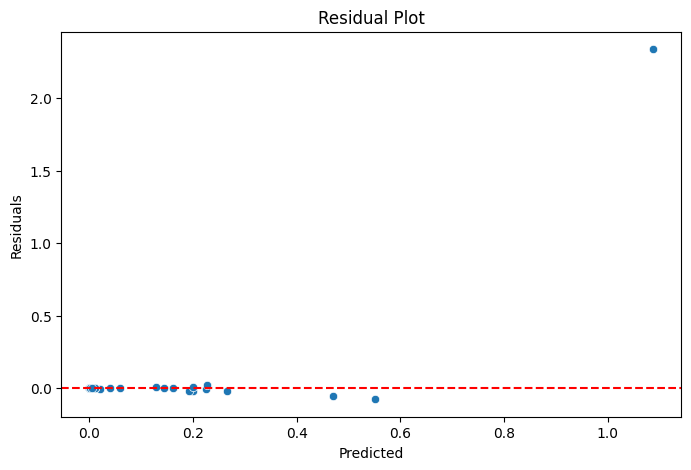

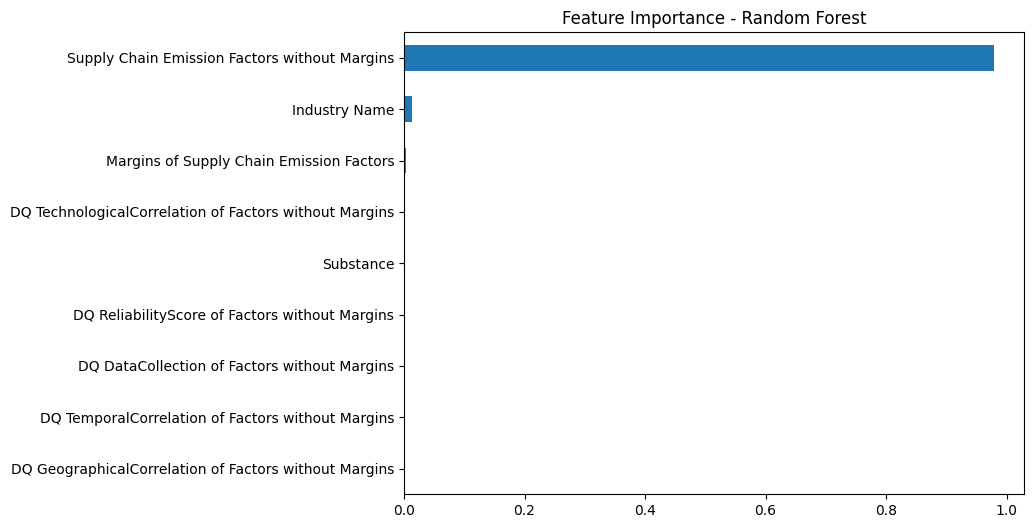

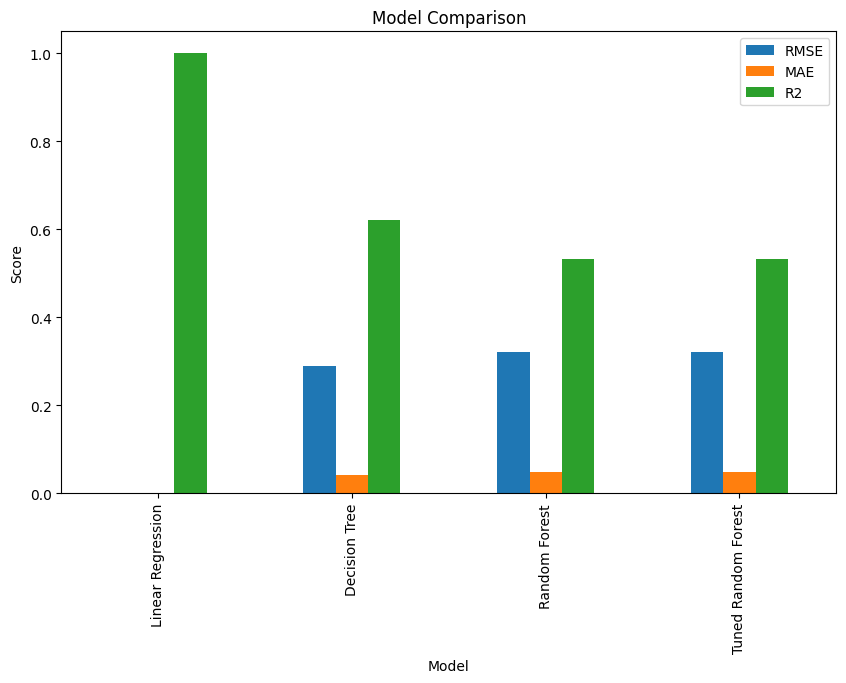

In [ ]:
# Residual plot for best model
y_pred = best_rf.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance - Random Forest")
plt.show()

# Model comparison bar chart
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
results_df.set_index("Model")[["RMSE", "MAE", "R2"]].plot(kind="bar", figsize=(10, 6), title="Model Comparison")
plt.ylabel("Score")
plt.show()

In [ ]:
# Save the best model
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Best model saved as 'best_random_forest_model.pkl'")

Best model saved as 'best_random_forest_model.pkl'
